# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [ ]:
%pip --no-cache-dir install tensorflow-datasets --user

# Necessary imports:

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
tfds.disable_progress_bar()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from PIL import Image
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import pandas as pd
import numpy as np
import json
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.6.0
	• tf.keras version: 2.6.0
	• Running on GPU


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [ ]:

# Downloading data to default local directory "~/tensorflow_datasets":
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# Loading the dataset with TensorFlow Datasets:
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Creation of a training set, a validation set and a test set:

training_set, validation_set,test_set = dataset['train'], dataset['validation'], dataset['test']


2021-09-29 22:54:09.354829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 22:54:09.382937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 22:54:09.383772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
I0929 22:54:09.384705 139970296661888 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
oxford_flowers102
2021-09-29 22:54:09.388631: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-09-29

In [ ]:
# Data Examination:

dataset= training_set, validation_set, test_set

print('dataset has type:', type(dataset))
print('dataset has {:,} elements '.format(len(dataset)))

dataset
dataset_info

dataset has type: <class 'tuple'>
dataset has 3 elements 


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=2.1.1,
    description='The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).',
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    total_num_examples=8

## Explore the Dataset

In [ ]:


# Getting the number of examples in each set from the dataset info:

num_examples_train = dataset_info.splits['train'].num_examples
num_examples_validation = dataset_info.splits['validation'].num_examples
num_examples_test = dataset_info.splits['test'].num_examples

print('The number of examples in the training are {:,} '.format(num_examples_train))
print('The number of examples in the validation set are {:,} '.format(num_examples_validation))
print('The number of examples in the testing set are {:,}'.format(num_examples_test))
print("\n")


# Getting the number of classes in the dataset from the dataset info:
num_classes = dataset_info.features['label'].num_classes
print('The number of classes in the given dataset are {:,} '.format(num_classes))


The number of examples in the training are 1,020 
The number of examples in the validation set are 1,020 
The number of examples in the testing set are 6,149


The number of classes in the given dataset are 102 


In [ ]:
# TODO: Print the shape and corresponding label of 3 images in the training set:


for image, label in training_set.take(3):
  print('The shape of one image in the training set is: ',image.shape)
  print('The label of one image in the training set is : ', label.numpy())

The shape of one image in the training set is:  (500, 667, 3)
The label of one image in the training set is :  72
The shape of one image in the training set is:  (500, 666, 3)
The label of one image in the training set is :  84
The shape of one image in the training set is:  (670, 500, 3)
The label of one image in the training set is :  70


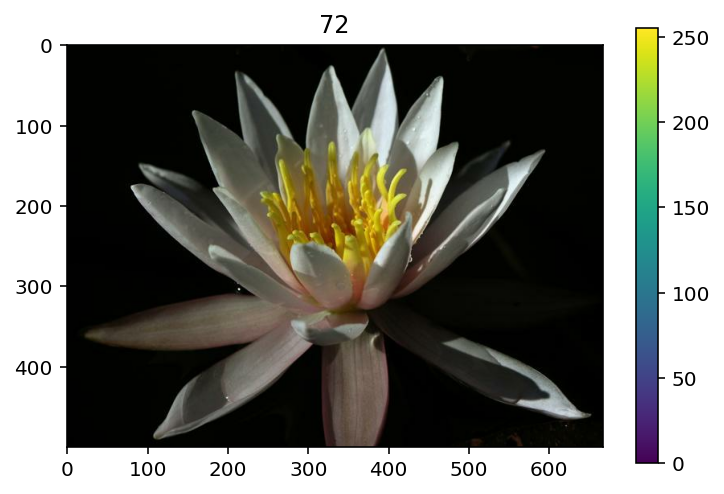

In [ ]:
# Plotting 1 image from the training set and setting the title of the plot to the corresponding image label: 

for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()
    plt.imshow(image), plt.title(label)
    plt.colorbar()
    

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [ ]:
# Definition of the dictionary of the actual labels:

json_dic = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", 
 "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger",
 "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", 
 "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy",
 "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", 
 "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil",
 "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", 
 "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold",
 "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
 "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine",
 "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea",
 "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis",
 "58": "geranium", "75": "thorn apple", "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", 
 "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", "77": "passion flower", "51": "petunia"}

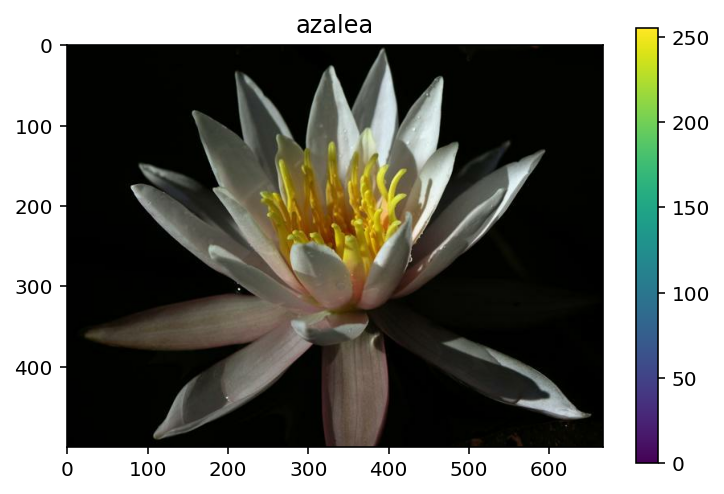

In [ ]:
# Plotting 1 image from the training set. Set the title of the plot to the corresponding class name: 

for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()
    plt.imshow(image), plt.title(json_dic[str(label)])
    plt.colorbar()



## Create Pipeline

In [ ]:
# Creating a pipeline for each set:

image_size = 224

def reshape_image(image, label):
  image = tf.cast(image, tf.float32)
  image =  tf.image.resize(image, [image_size, image_size])
  image /= 255
  return image, label

# Printting the shape of the images for training, validation, and testing sets after images processing
for image, label in training_set.take(3):
  print('The shape of three images in the training set is: ',reshape_image(image, label)[0].shape)  
for image, label in validation_set.take(3):
  print('The shape of three images in the validation set is: ',reshape_image(image, label)[0].shape)

for image, label in test_set.take(3):
  print('The shape of three images in the testing set is: ',reshape_image(image, label)[0].shape)


batch_size = 32

training_batches = training_set.shuffle(num_examples_train//2).map(reshape_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(reshape_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(reshape_image).batch(batch_size).prefetch(1)


The shape of three images in the training set is:  (224, 224, 3)
The shape of three images in the training set is:  (224, 224, 3)
The shape of three images in the training set is:  (224, 224, 3)
The shape of three images in the validation set is:  (224, 224, 3)
The shape of three images in the validation set is:  (224, 224, 3)
The shape of three images in the validation set is:  (224, 224, 3)
The shape of three images in the testing set is:  (224, 224, 3)
The shape of three images in the testing set is:  (224, 224, 3)
The shape of three images in the testing set is:  (224, 224, 3)


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [ ]:
# Loading the MobileNet pre-trained model from TensorFlow Hub .
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

Features_extractor = hub.KerasLayer(URL, input_shape = (image_size,image_size,3))
Features_extractor.trainable = False

In [ ]:
# Buliding the new model:

model = tf.keras.Sequential([Features_extractor, tf.keras.layers.Dense(num_classes, activation = 'softmax')])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
	• Running on GPU


In [ ]:
# Training the model:


Epochs = 20

Early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss' , patience= 5)

History = model.fit(training_batches,
                    epochs = Epochs,
                    validation_data = validation_batches,
                    callbacks = [Early_stopping])


Epoch 1/20
32/32 [==============================] - 43s 262ms/step - loss: 4.2804 - accuracy: 0.1108 - val_loss: 3.0605 - val_accuracy: 0.3765
Epoch 2/20
32/32 [==============================] - 8s 238ms/step - loss: 2.0670 - accuracy: 0.6951 - val_loss: 1.9924 - val_accuracy: 0.6588
Epoch 3/20
32/32 [==============================] - 8s 238ms/step - loss: 1.0961 - accuracy: 0.9108 - val_loss: 1.5231 - val_accuracy: 0.7402
Epoch 4/20
32/32 [==============================] - 8s 238ms/step - loss: 0.6656 - accuracy: 0.9618 - val_loss: 1.2788 - val_accuracy: 0.7775
Epoch 5/20
32/32 [==============================] - 8s 237ms/step - loss: 0.4425 - accuracy: 0.9843 - val_loss: 1.1360 - val_accuracy: 0.7990
Epoch 6/20
32/32 [==============================] - 8s 238ms/step - loss: 0.3162 - accuracy: 0.9961 - val_loss: 1.0508 - val_accuracy: 0.8088
Epoch 7/20
32/32 [==============================] - 8s 239ms/step - loss: 0.2364 - accuracy: 0.9971 - val_loss: 0.9918 - val_accuracy: 0.8137
Epoch

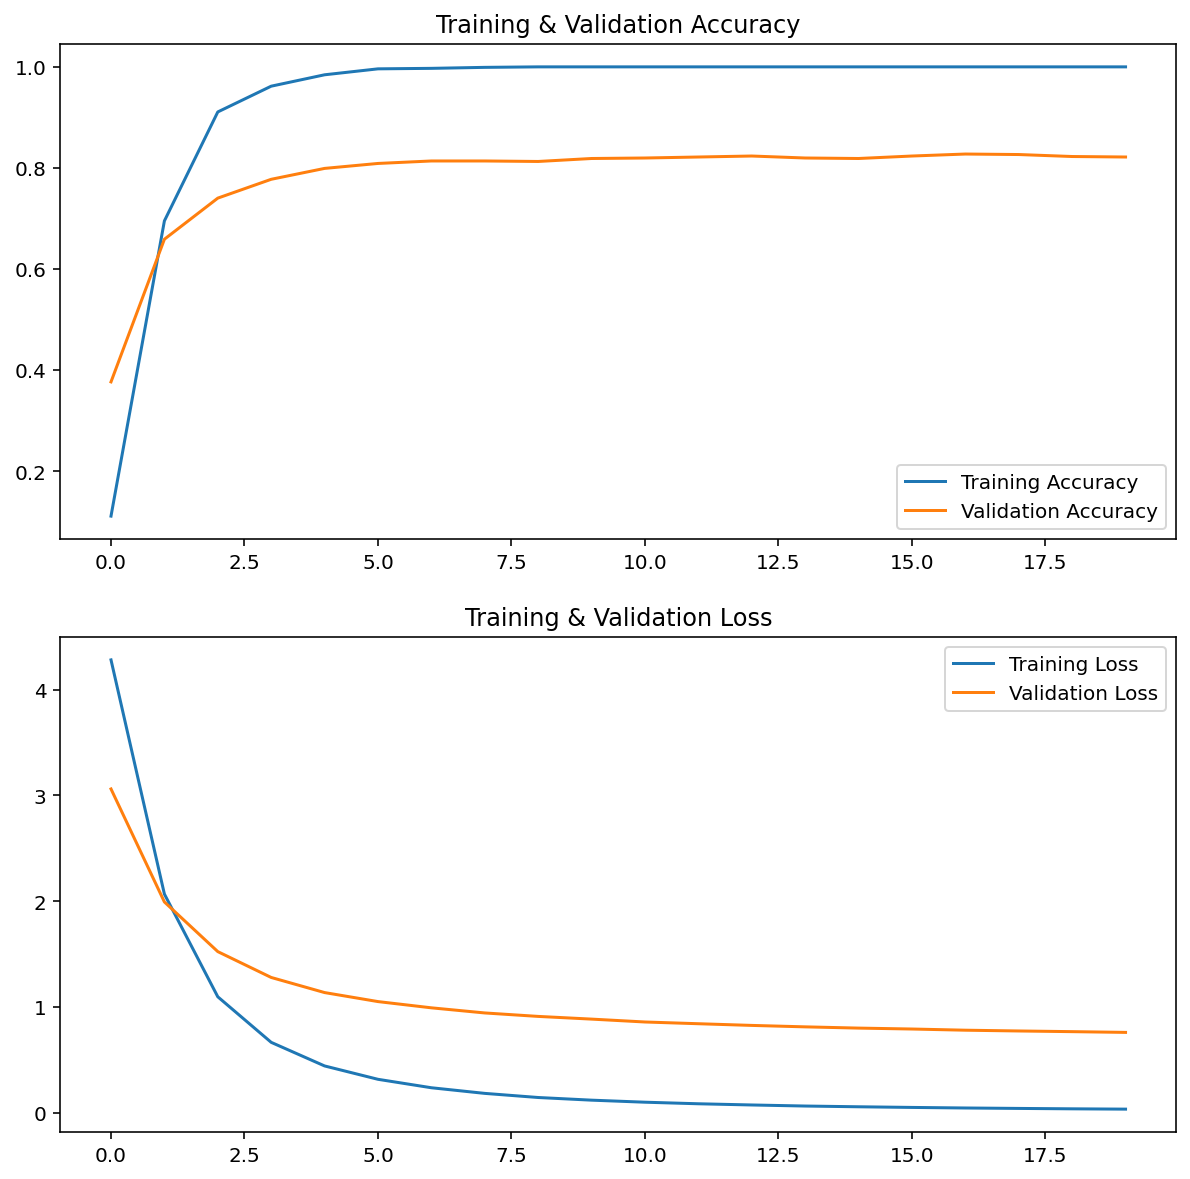

In [ ]:
# Plotting the loss and accuracy values achieved during training for the training and validation set:

Training_Accuracy = History.history['accuracy']
Validation_Accuracy = History.history['val_accuracy']

Training_Loss = History.history['loss']
Validation_Loss = History.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, Training_Accuracy, label='Training Accuracy')
plt.plot(epochs_range, Validation_Accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(epochs_range, Training_Loss , label='Training Loss')
plt.plot(epochs_range, Validation_Loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [ ]:
# Printing the loss and accuracy values achieved on the entire test set:

LOSS, ACCURACY = model.evaluate(testing_batches)

print('The loss in the Testing Set is: {:,.3f}'.format(LOSS))
print('The accuracy of the Testing Set is: {:.3%}'.format(ACCURACY))

193/193 [==============================] - 26s 133ms/step - loss: 0.8890 - accuracy: 0.7818
The loss in the Testing Set is: 0.889
The accuracy of the Testing Set is: 78.175%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [ ]:
# Saving the trained model as a Keras model:

file_path = './oxford_flowers102.h5'
model.save(file_path)

t = time.time()

Model_dir = './{}_oxford_flowers102_weights'.format(int(t))

tf.saved_model.save(model, Model_dir)


## Load the Keras Model

Load the Keras model you saved above.

In [ ]:
# Loading the Keras model:

Keras_model = tf.keras.models.load_model(file_path, custom_objects={'KerasLayer':hub.KerasLayer})

Keras_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [ ]:
# Creating the process_image function:

def process_image(image, image_size=224):
    image = tf.convert_to_tensor(image)
    image = tf.image.resize(image,(image_size, image_size))
    image = tf.cast(image,tf.float32)
    image /= 255
    return image.numpy()


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

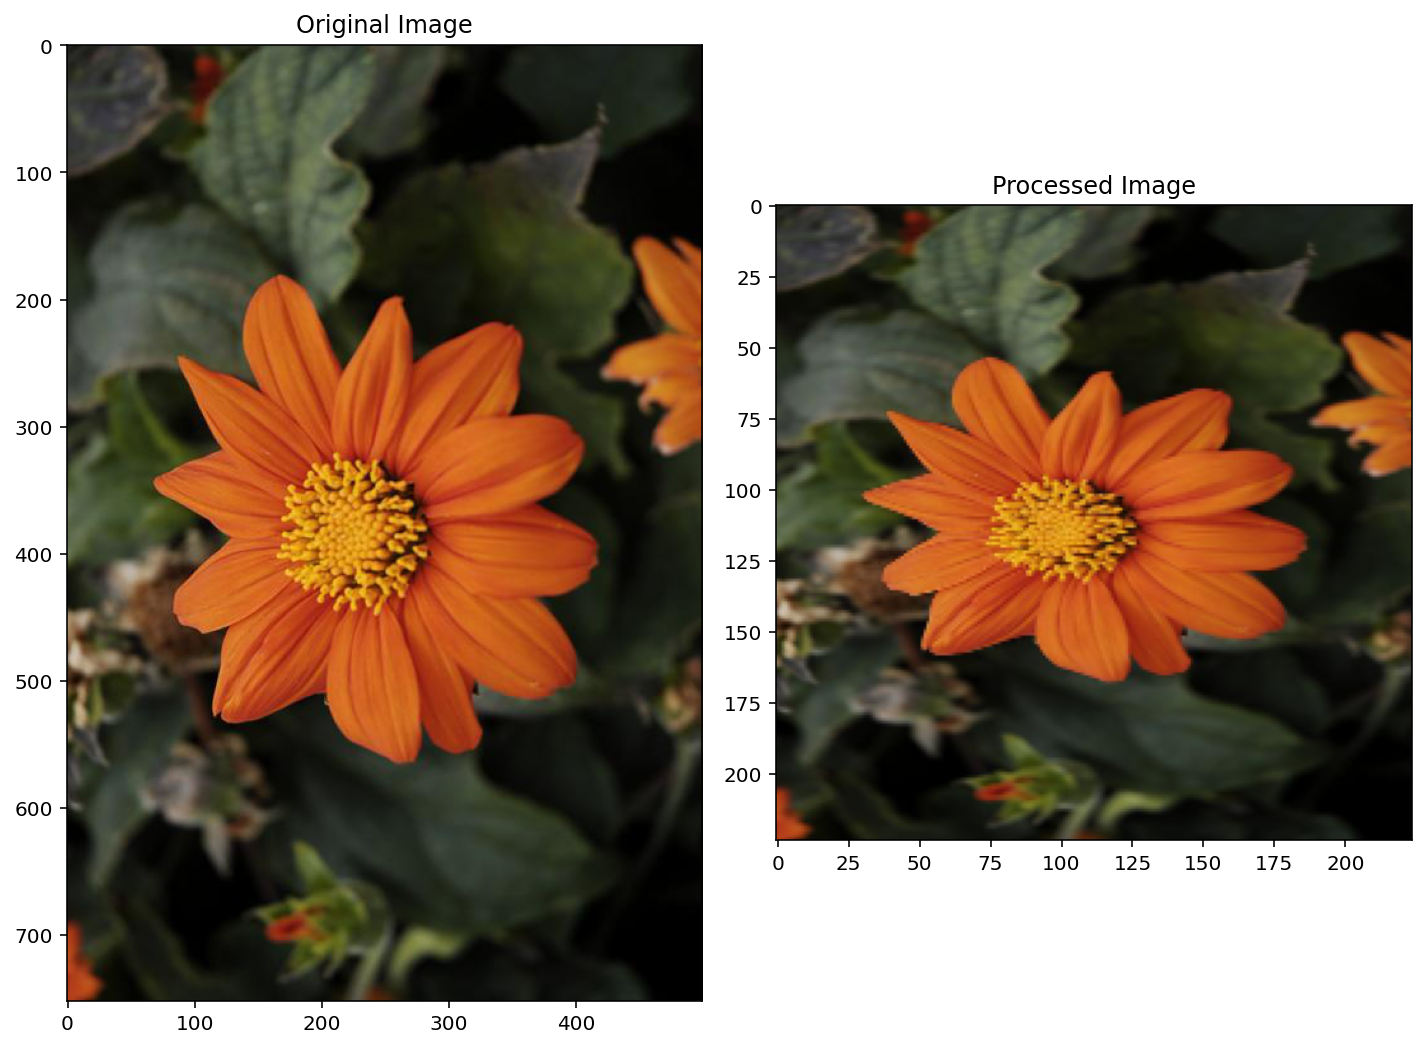

In [ ]:
# Loading one image:
image_path = '/content/images/orange_dahlia.jpg'
IMAGE = Image.open(image_path)
tested_image = np.asarray(IMAGE)

#Processing the selected image:
processed_tested_image = process_image(tested_image)

# Plotting the selected image before and after processing:
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(tested_image)
ax1.set_title('Original Image')
ax2.imshow(processed_tested_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [ ]:
# TODO: Create the predict function

def predict(image_path, model, top_k=1, image_size=224):
    image = Image.open(image_path)
    image = np.asarray(image)
    processed_image = process_image(image, image_size)
    expanded_image = np.expand_dims(processed_image, axis=0)
    probes = model.predict(expanded_image)
    top_k_values, top_k_indices = tf.nn.top_k(probes, k=top_k) 
    
    top_k_values = top_k_values.numpy()
    top_k_indices = top_k_indices.numpy()
    
    return top_k_values, top_k_indices, processed_image

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

propabilties: [[0.9441797  0.01923462 0.00953494 0.00404565 0.00238977]]
classes: [[60 23 45 10 38]]
predicted_classes_names:
  -  cautleya spicata
  -  red ginger
  -  wallflower
  -  snapdragon
  -  siam tulip


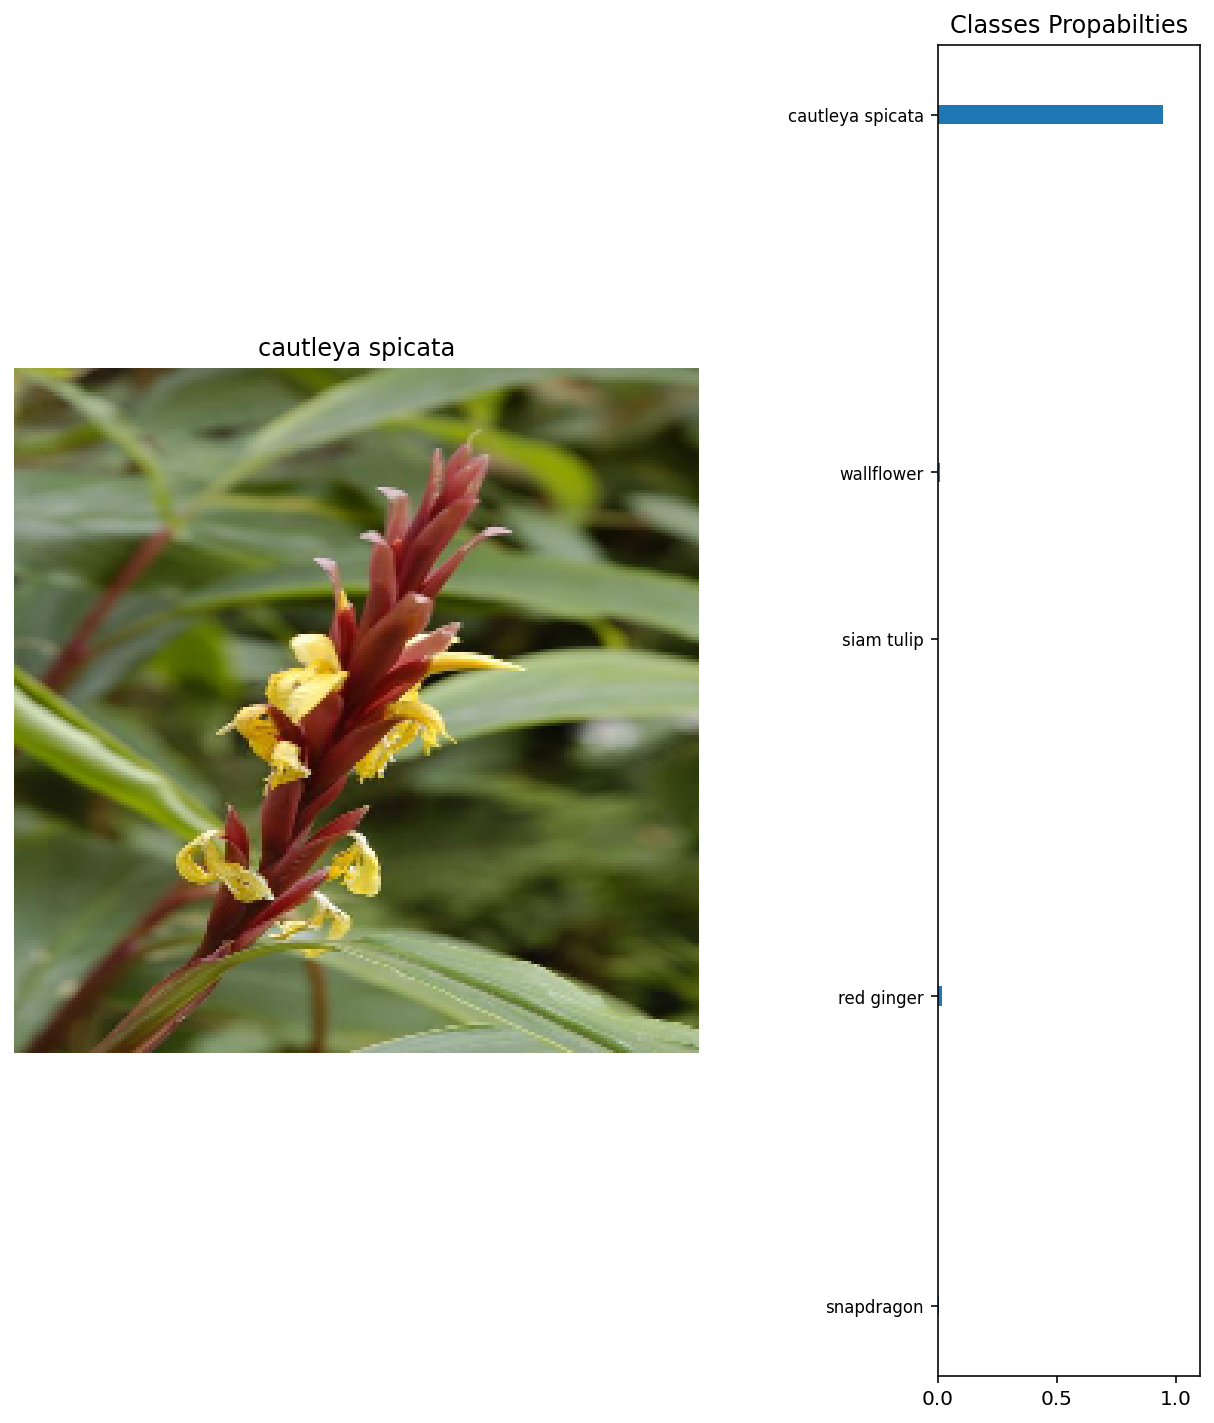

propabilties: [[9.9431890e-01 2.4845528e-03 8.7533903e-04 7.1170530e-04 4.5219675e-04]]
classes: [[ 1 79  6 67  5]]
predicted_classes_names:
  -  hard-leaved pocket orchid
  -  anthurium
  -  moon orchid
  -  bearded iris
  -  tiger lily


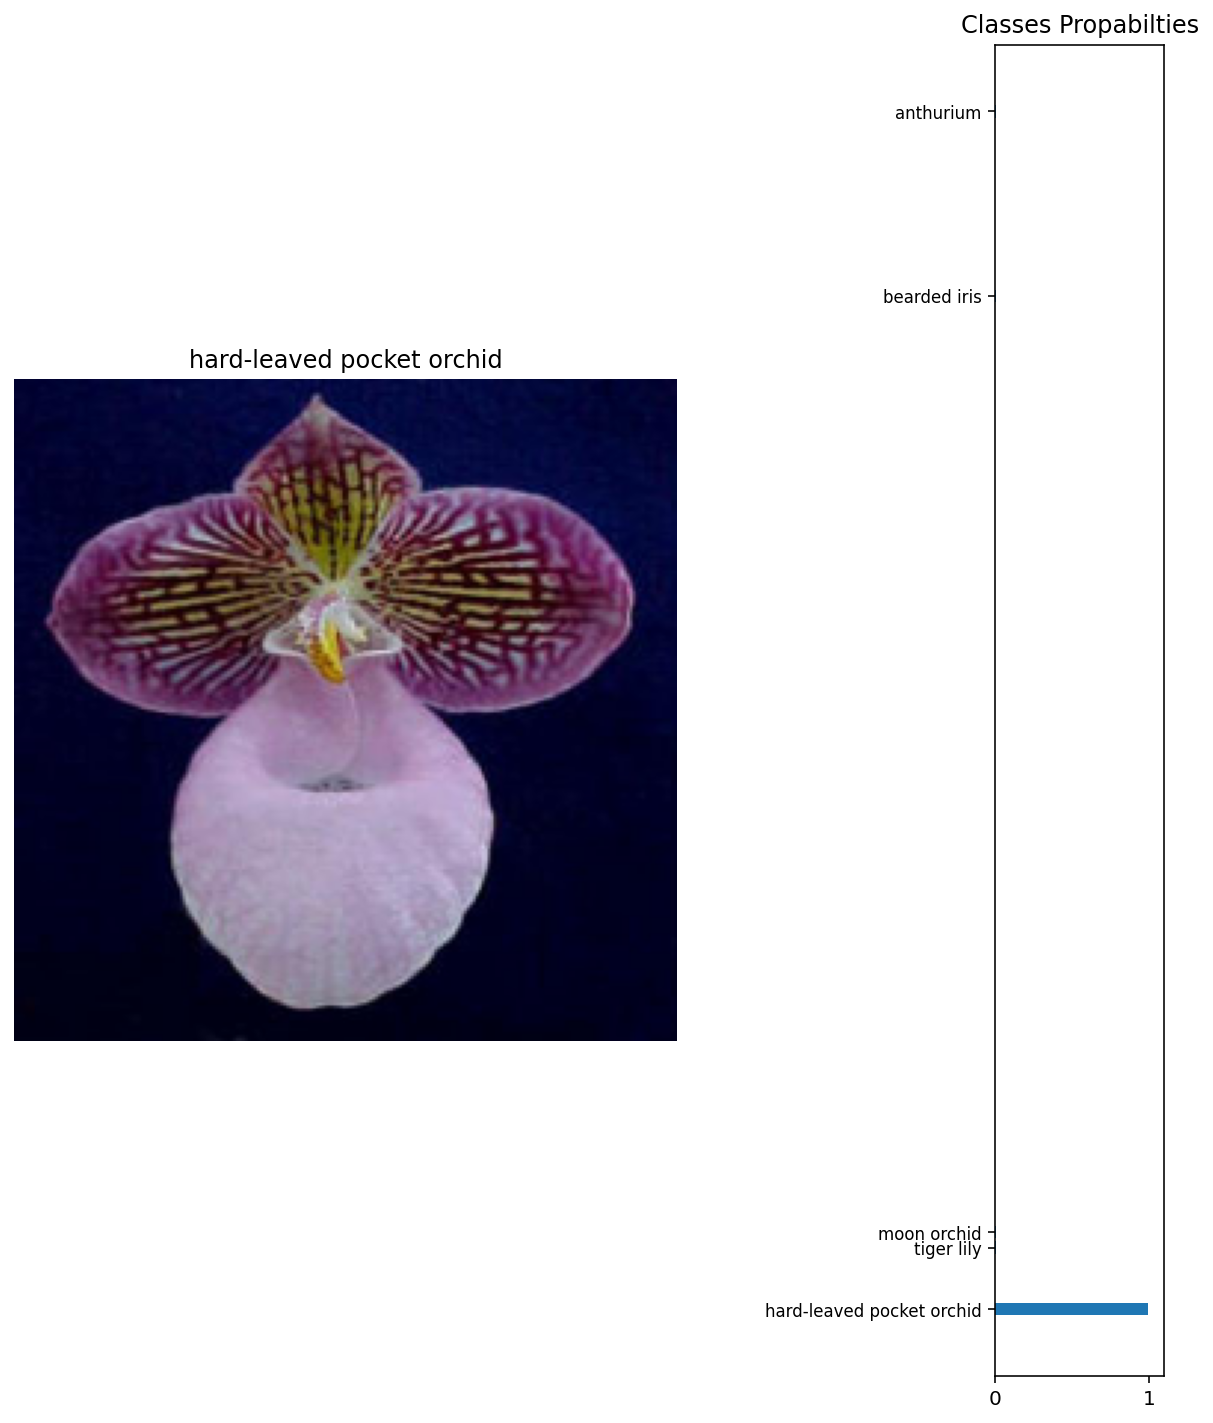

propabilties: [[0.35923707 0.33717915 0.06257283 0.05088167 0.02570664]]
classes: [[58  4 99 65 40]]
predicted_classes_names:
  -  orange dahlia
  -  english marigold
  -  blanket flower
  -  osteospermum
  -  barbeton daisy


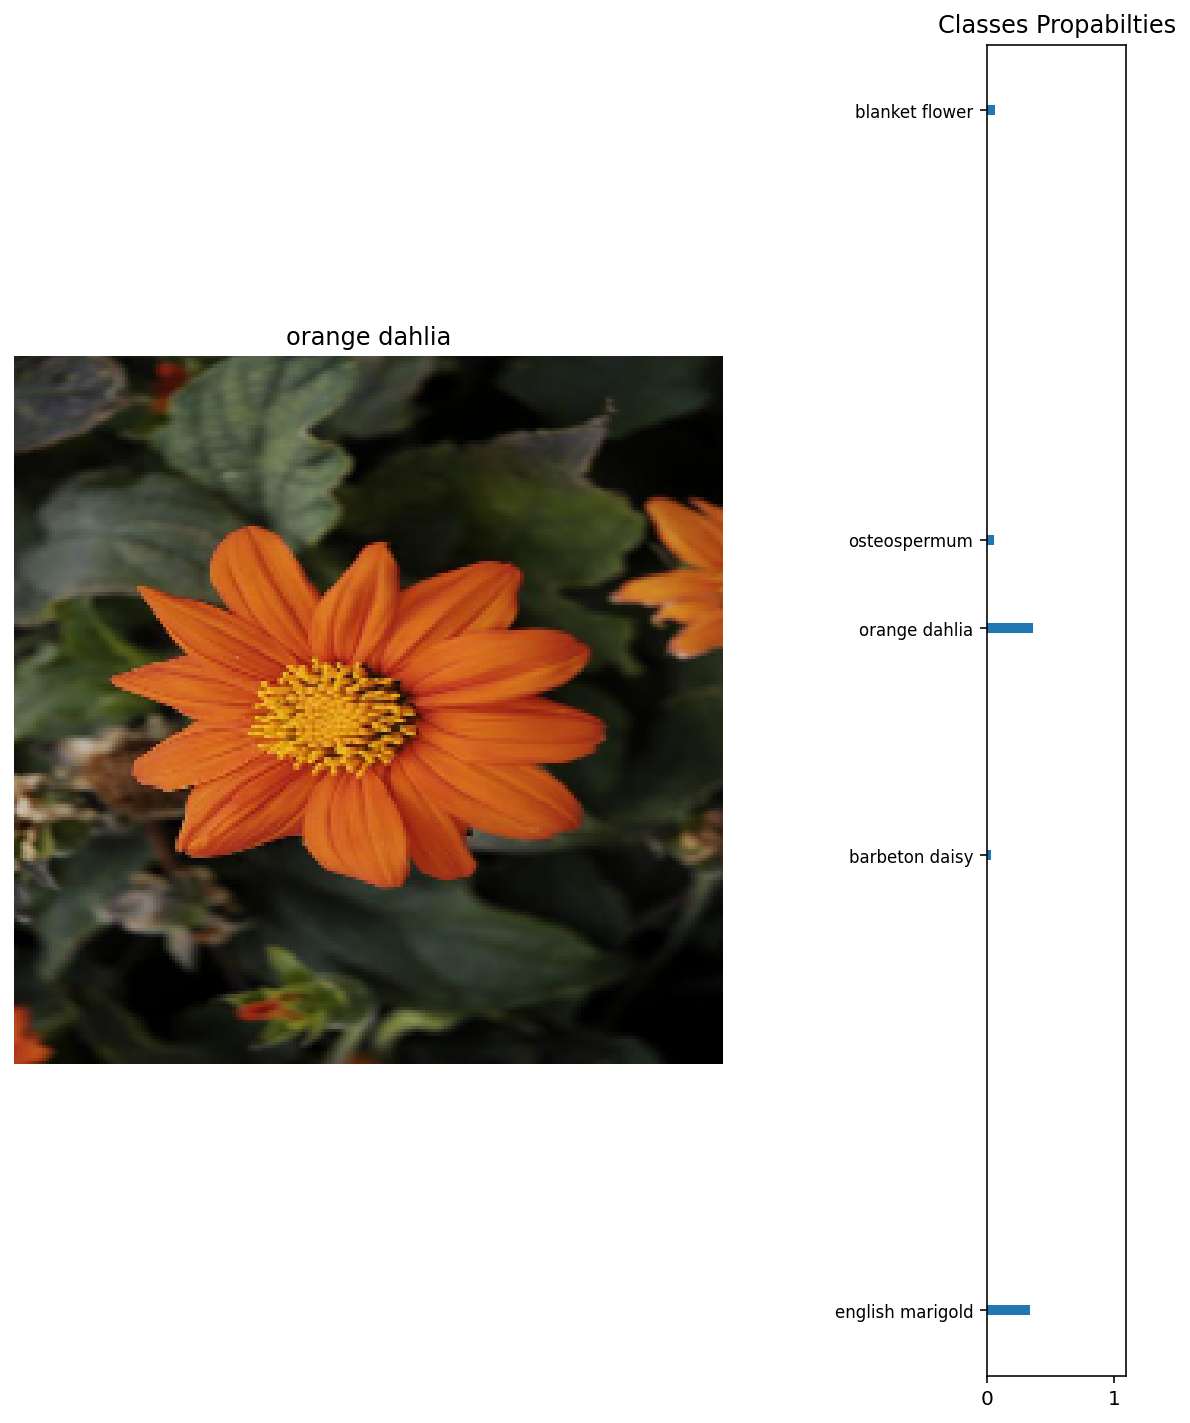

propabilties: [[9.9531049e-01 1.0598241e-03 8.0491003e-04 6.9518364e-04 3.7607350e-04]]
classes: [[51 63 18 81 33]]
predicted_classes_names:
  -  wild pansy
  -  silverbush
  -  balloon flower
  -  clematis
  -  mexican aster


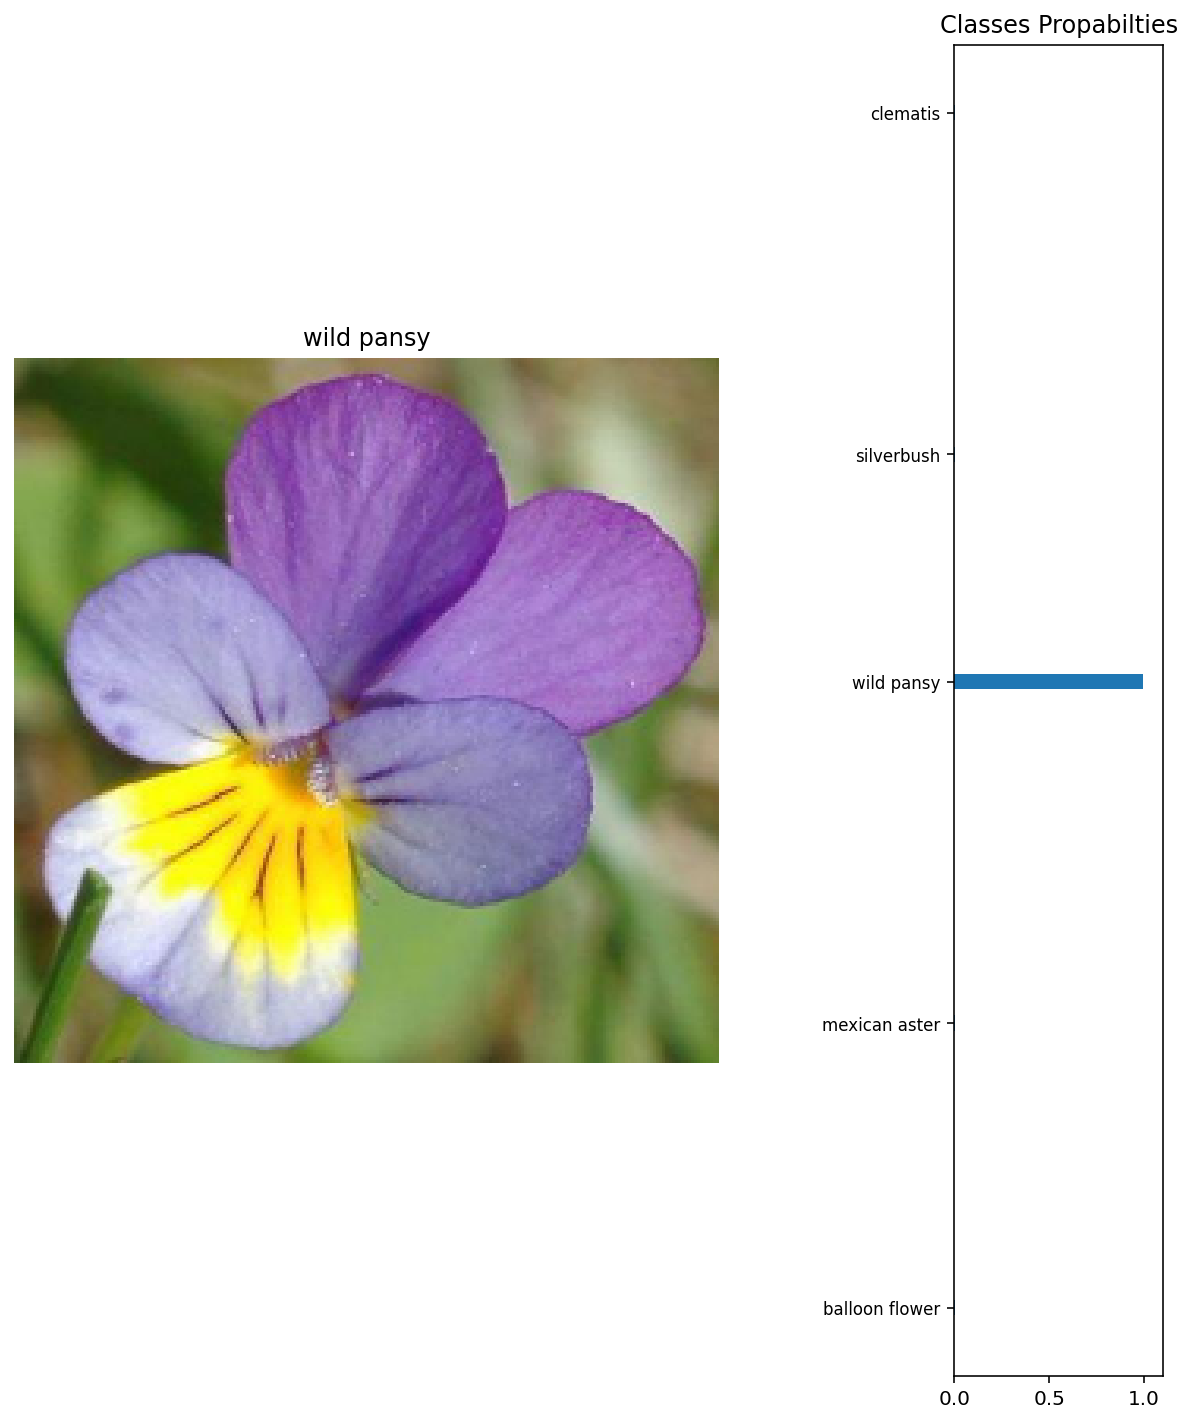

In [ ]:
# Plotting the input image along with the top 5 classes:

images_paths = ['/content/images/cautleya_spicata.jpg',
                '/content/images/hard-leaved_pocket_orchid.jpg',
                '//content/images/orange_dahlia.jpg',
                '/content/images/wild_pansy.jpg']
        
Top_Classes = 5
for img_path in images_paths:
    path = img_path
    top_values, top_indices, image = predict(path, Keras_model, Top_Classes)
    print('propabilties:', top_values)
    print('classes:', top_indices)
    
    predicted_classes_names = []
    print("predicted_classes_names:")
    for i in top_indices[0]:
        print("  - ",json_dic[str(i + 1)])
        predicted_classes_names.append(json_dic[str(i + 1)])
        
    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title(predicted_classes_names[0])
    ax2.barh(top_indices[0], top_values[0])
    ax2.set_aspect(0.1)
    ax2.set_yticks(top_indices[0])
    ax2.set_yticklabels(predicted_classes_names, size='small');
    ax2.set_title('Classes Propabilties')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()
